In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown
from sklearn.preprocessing import StandardScaler

from utils.common.merge_df import (merge_forcast_and_train_df,
                                   remove_NaN_rows)
from utils.common.train_model import (train_model,
                                      train_model_cv,
                                      train_model_stacking,
                                      test_model)
from utils.common.create_features import (create_seasons,
                                          create_datetime_features,
                                          create_adjusted_values,
                                          check_if_in_daylight,
                                          create_rolling_avg)

In [2]:
df_forecast = pd.read_parquet('../Daten/forecasts.parquet')
df_test1 = pd.read_parquet('../Daten/energy_test1.parquet')
df_test2 = pd.read_parquet('../Daten/energy_test2.parquet')
df_train = pd.read_parquet('../Daten/energy_train.parquet')

In [3]:
# entferne alle NaN Werte aus den Daten
df_train, df_forecast = remove_NaN_rows(df_train, df_forecast)


In [4]:
# füge rolling avergae in forcast hinzu
df_forecast.head(30)

ref_datetime  valid_time  SolarDownwardRadiation  CloudCover  \
0  2020-09-20 00:00:00+00:00          20                0.000000    0.366211   
1  2020-09-20 00:00:00+00:00          21                0.001263    0.471512   
2  2020-09-20 00:00:00+00:00          22                0.001532    0.398212   
3  2020-09-20 00:00:00+00:00          23                0.000000    0.292247   
4  2020-09-20 00:00:00+00:00          24                0.000000    0.327759   
5  2020-09-20 00:00:00+00:00          25                0.008838    0.436067   
6  2020-09-20 00:00:00+00:00          26                0.015384    0.468752   
7  2020-09-20 00:00:00+00:00          27                0.000000    0.501229   
8  2020-09-20 00:00:00+00:00          28                0.000000    0.514093   
9  2020-09-20 00:00:00+00:00          29                1.250084    0.511446   
10 2020-09-20 00:00:00+00:00          30               48.015005    0.501939   
11 2020-09-20 00:00:00+00:00          31              144.297696    0.517783   
12 2020-09-20 00:00:00+00:00          32              257.783777    0.492161   
13 2020-09-20 00:00:00+00:00          33              377.001429    0.490347   
14 2020-09-20 00:00:00+00:00          34              455.813103    0.422091   
15 2020-09-20 00:00:00+00:00          35              493.583502    0.334689   
16 2020-09-20 00:00:00+00:00          36              488.307175    0.239238   
17 2020-09-20 00:00:00+00:00          37              439.955563    0.132127   
18 2020-09-20 00:00:00+00:00          38              354.616748    0.082360   
19 2020-09-20 00:00:00+00:00          39              242.686700    0.069447   
20 2020-09-20 00:00:00+00:00          40              122.119815    0.056336   
21 2020-09-20 00:00:00+00:00          41               24.310806    0.009284   
22 2020-09-20 00:00:00+00:00          42                0.000000    0.000000   
23 2020-09-20 00:00:00+00:00          43                0.015976    0.000000   
24 2020-09-20 00:00:00+00:00          44                0.000000    0.000833   
25 2020-09-20 00:00:00+00:00          45                0.013519    0.014299   
26 2020-09-20 00:00:00+00:00          46                0.003769    0.056934   
27 2020-09-20 00:00:00+00:00          47                0.000000    0.127904   
28 2020-09-20 00:00:00+00:00          48                0.025760    0.184854   
29 2020-09-20 00:00:00+00:00          49                0.000000    0.288533   

    Temperature Weather Model  
0     13.823755      DWD ICON  
1     13.427564      DWD ICON  
2     13.093005      DWD ICON  
3     12.667871      DWD ICON  
4     12.216522      DWD ICON  
5     12.015985      DWD ICON  
6     11.813635      DWD ICON  
7     11.651337      DWD ICON  
8     11.516748      DWD ICON  
9     11.404633      DWD ICON  
10    11.218066      DWD ICON  
11    12.004999      DWD ICON  
12    13.755713      DWD ICON  
13    15.414795      DWD ICON  
14    16.773096      DWD ICON  
15    18.095942      DWD ICON  
16    19.267498      DWD ICON  
17    20.221247      DWD ICON  
18    20.855927      DWD ICON  
19    20.903381      DWD ICON  
20    20.399054      DWD ICON  
21    19.207850      DWD ICON  
22    17.145350      DWD ICON  
23    15.362366      DWD ICON  
24    14.183454      DWD ICON  
25    13.375341      DWD ICON  
26    12.586634      DWD ICON  
27    11.974731      DWD ICON  
28    11.590991      DWD ICON  
29    11.099591      DWD ICON

In [5]:

# merge die Daten
merged_df = merge_forcast_and_train_df(df_forecast, df_train)

In [6]:
merged_df.head()

dtm              ref_datetime  Solar_capacity_mwp  \
0 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
2 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
3 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
4 2020-09-21 02:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   

   Solar_MWh  valid_time  SolarDownwardRadiation  CloudCover  Temperature  \
0        0.0          24                0.000000    0.327759    12.216522   
1        0.0          24                0.000000    0.002000    12.240011   
2        0.0          25                0.008838    0.436067    12.015985   
3        0.0          25                0.000000    0.003000    12.032483   
4        0.0          26                0.015384    0.468752    11.813635   

  Weather Model            valid_datetime  
0      DWD ICON 2020-09-21 00:00:00+00:00  
1      NCEP GFS 2020-09-21 00:00:00+00:00  
2      DWD ICON 2020-09-21 01:00:00+00:00  
3      NCEP GFS 2020-09-21 01:00:00+00:00  
4      DWD ICON 2020-09-21 02:00:00+00:00

In [7]:
# Erstelle Jahreszeiten als categorical feature
merged_df = await create_seasons(merged_df)

# Erstelle Spalten für Stunden und Monate
merged_df = await create_datetime_features(merged_df)


merged_df = await check_if_in_daylight(merged_df)

# Erstelle Spalten für die adjustierten Werte
# Können wir wieder auskommentieren wenn wir das wieder testen 
merged_df = await create_adjusted_values(merged_df)

merged_df = await create_rolling_avg(merged_df)

merged_df

                        dtm              ref_datetime  Solar_capacity_mwp  \
0 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1 2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
2 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
3 2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
4 2020-09-21 02:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   

   Solar_MWh  valid_time  SolarDownwardRadiation  CloudCover  Temperature  \
0        0.0          24                0.000000    0.327759    12.216522   
1        0.0          24                0.000000    0.002000    12.240011   
2        0.0          25                0.008838    0.436067    12.015985   
3        0.0          25                0.000000    0.003000    12.032483   
4        0.0          26                0.015384    0.468752    11.813635   

  Weather Model            valid_datetime  ... week_cos  \
0      DWD ICON

/home/jan-david/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jan-david/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


dtm              ref_datetime  Solar_capacity_mwp  \
0     2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
1     2020-09-21 00:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
2     2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
3     2020-09-21 01:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
4     2020-09-21 02:00:00+00:00 2020-09-20 00:00:00+00:00         2130.510089   
...                         ...                       ...                 ...   
39400 2022-12-31 21:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
39401 2022-12-31 22:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
39402 2022-12-31 22:00:00+00:00 2022-12-30 18:00:00+00:00         2212.678300   
39403 2022-12-31 23:00:00+00:00 2022-12-30 18:00:00+00:00         2237.476835   
39404 2022-12-31 23:00:00+00:00 2022-12-30 18:00:00+00:00         2237.476835   

       Solar_MWh  valid_time  SolarDownwardRadiation  CloudCover  Temperature  \
0            0.0          24                0.000000    0.327759    12.216522   
1            0.0          24                0.000000    0.002000    12.240011   
2            0.0          25                0.008838    0.436067    12.015985   
3            0.0          25                0.000000    0.003000    12.032483   
4            0.0          26                0.015384    0.468752    11.813635   
...          ...         ...                     ...         ...          ...   
39400        0.0          27                0.000000    1.000000    12.386409   
39401        0.0          28                0.000000    0.999715    11.612177   
39402        0.0          28                0.000000    1.000000    12.532788   
39403        0.0          29                0.002148    1.000000    11.141291   
39404        0.0          29                0.000000    1.000000    12.463732   

      Weather Model            valid_datetime  ... adjusted_radiation  \
0          DWD ICON 2020-09-21 00:00:00+00:00  ...           0.000000   
1          NCEP GFS 2020-09-21 00:00:00+00:00  ...           0.000000   
2          DWD ICON 2020-09-21 01:00:00+00:00  ...           0.004984   
3          NCEP GFS 2020-09-21 01:00:00+00:00  ...           0.000000   
4          DWD ICON 2020-09-21 02:00:00+00:00  ...           0.008173   
...             ...                       ...  ...                ...   
39400      NCEP GFS 2022-12-31 21:00:00+00:00  ...           0.000000   
39401      DWD ICON 2022-12-31 22:00:00+00:00  ...           0.000000   
39402      NCEP GFS 2022-12-31 22:00:00+00:00  ...           0.000000   
39403      DWD ICON 2022-12-31 23:00:00+00:00  ...           0.000000   
39404      NCEP GFS 2022-12-31 23:00:00+00:00  ...           0.000000   

      adjusted_temperature solar_efficiency Temperature_squared  \
0                 9.200860         0.000000          149.243415   
1                12.215580         0.000000          149.817875   
2                 8.367285        18.829215          144.383907   
3                11.996494         0.000000          144.780650   
4                 8.043315        32.775578          139.561969   
...                    ...              ...                 ...   
39400             6.193204         0.000000          153.423123   
39401             5.806916         0.000000          134.842652   
39402             6.266394         0.000000          157.070782   
39403             5.570645         4.807079          124.128358   
39404             6.231866         0.000000          155.344610   

       SolarDownwardRadiation_CloudCover  Log_Temperature  \
0                               0.000000         2.581468   
1                               0.000000         2.583243   
2                               0.003854         2.566178   
3                               0.000000         2.567445   
4                               0.007211         2.550510   
...                               

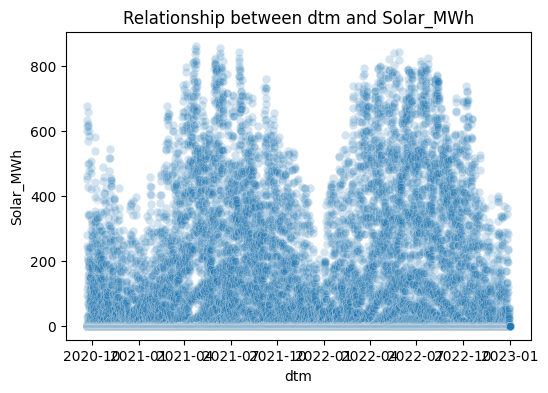

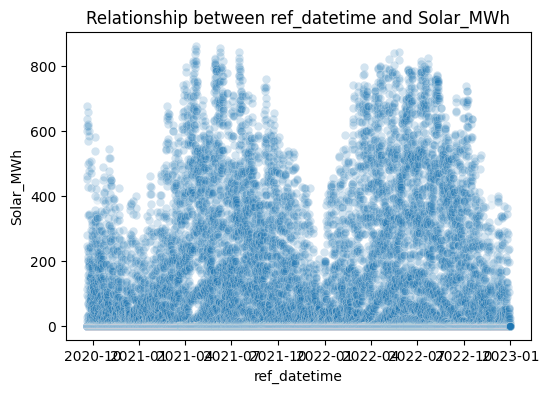

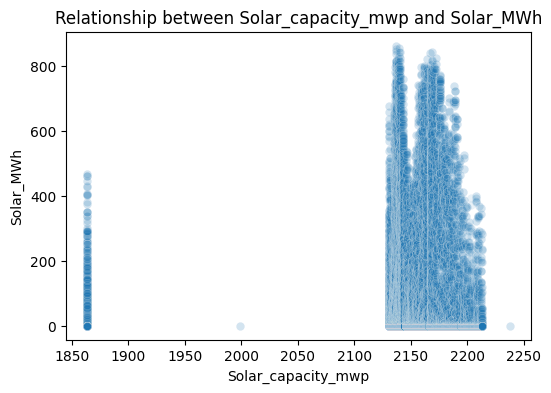

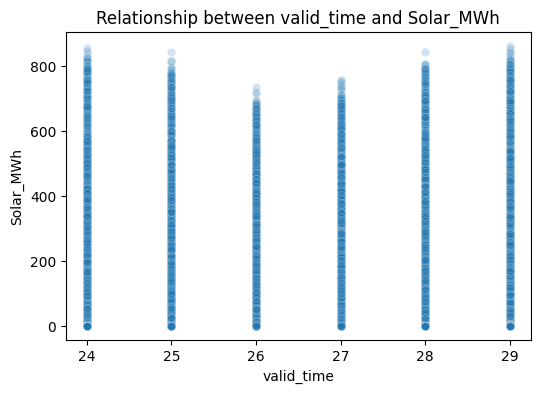

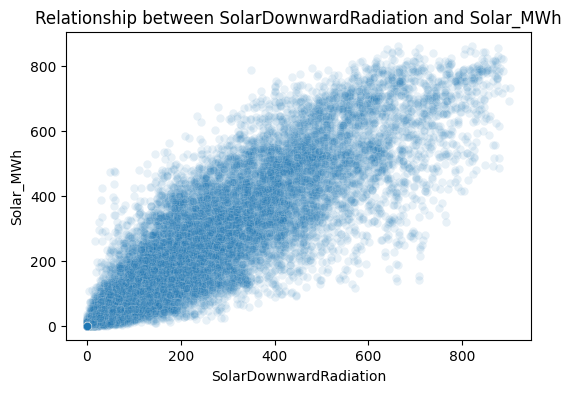

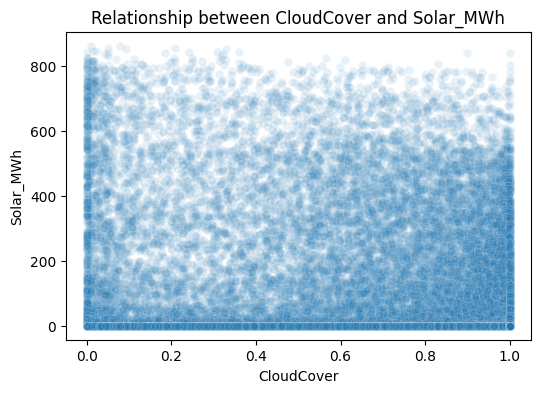

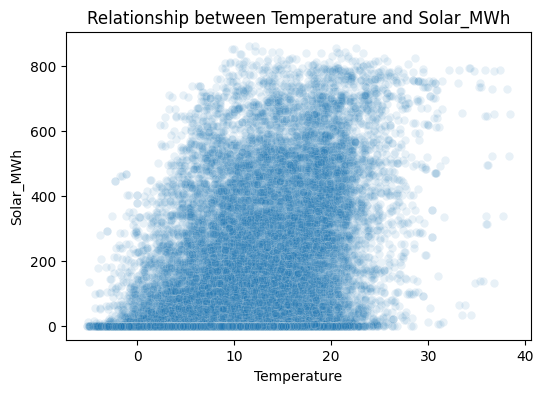

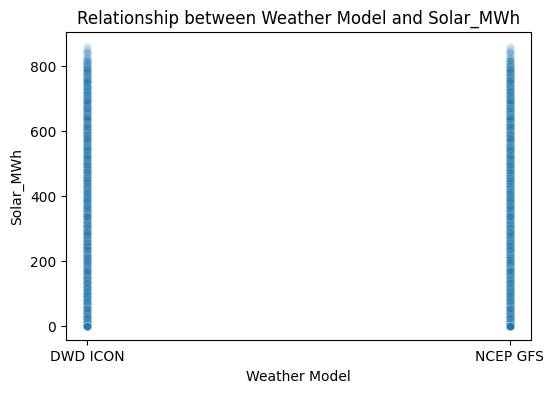

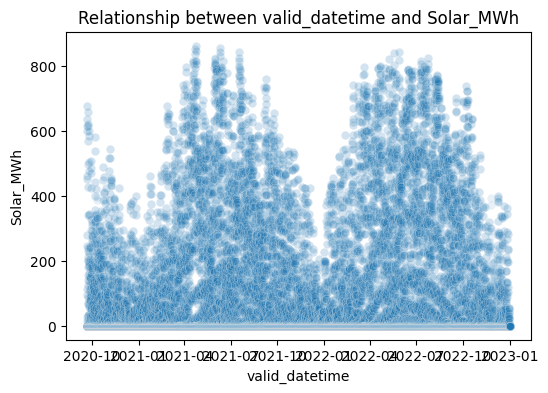

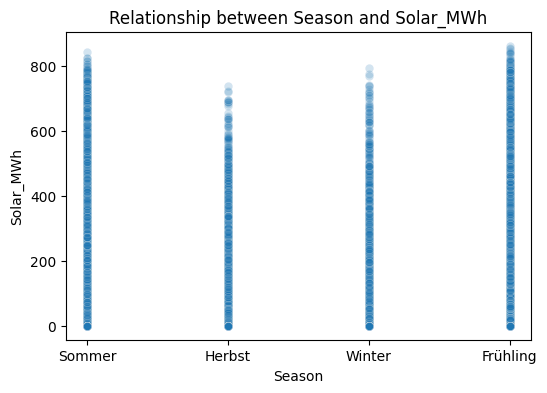

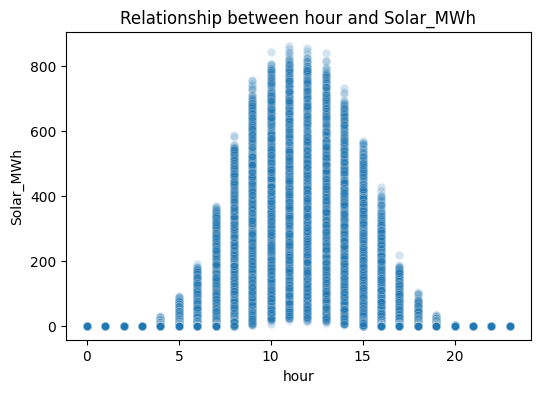

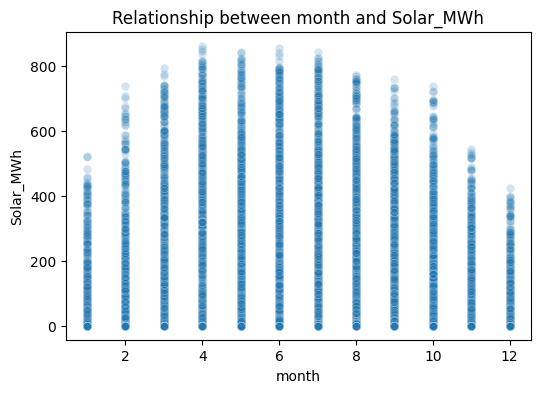

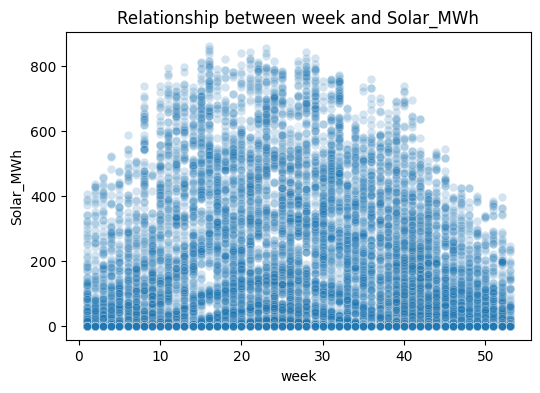

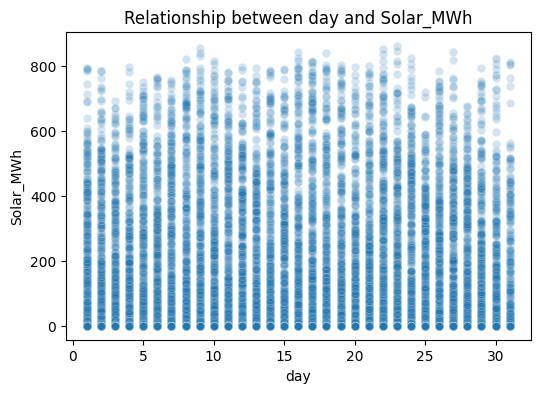

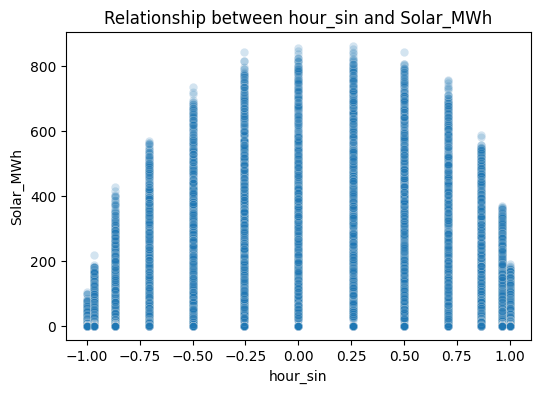

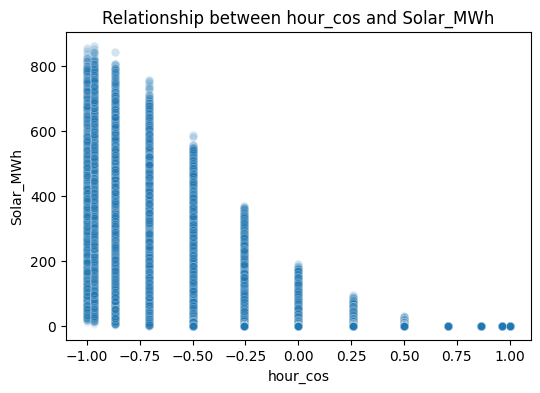

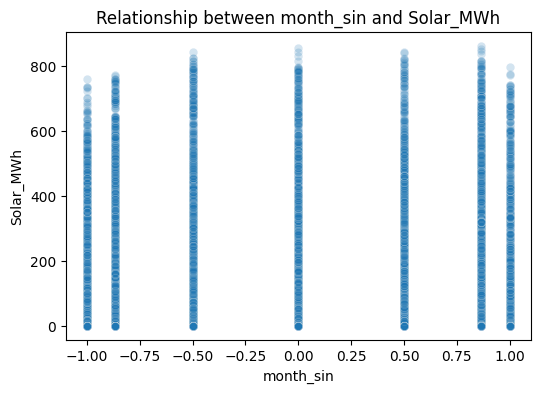

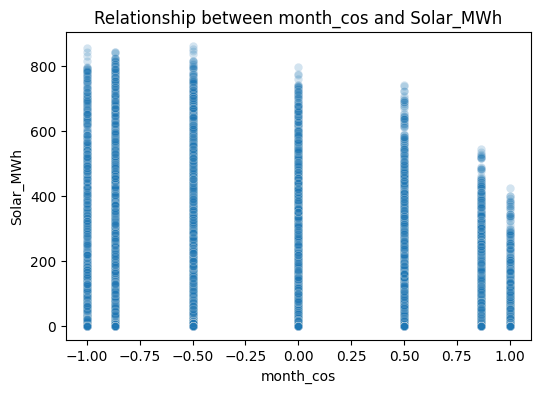

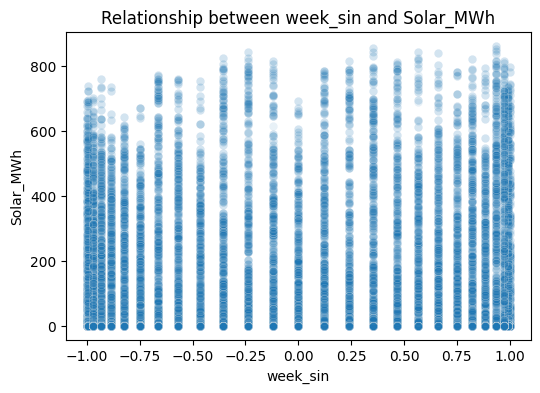

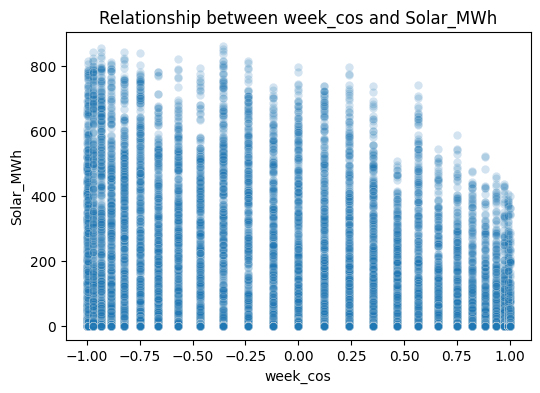

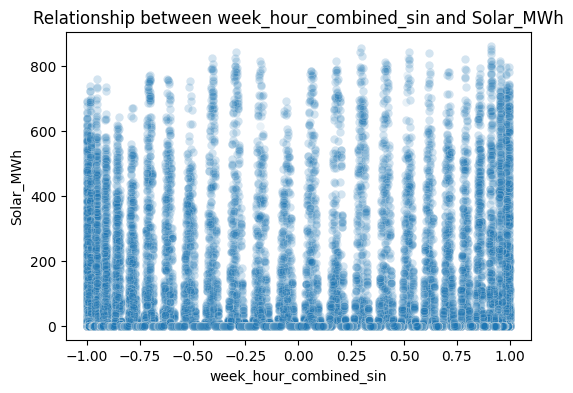

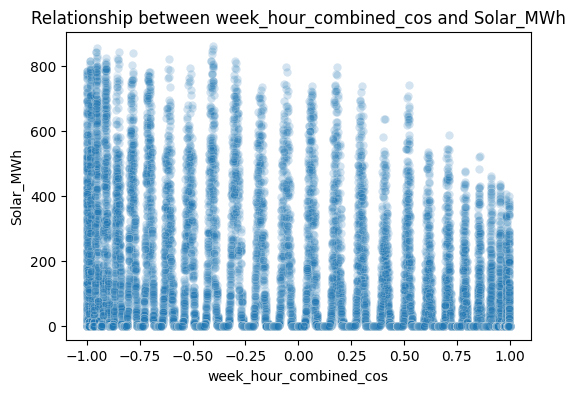

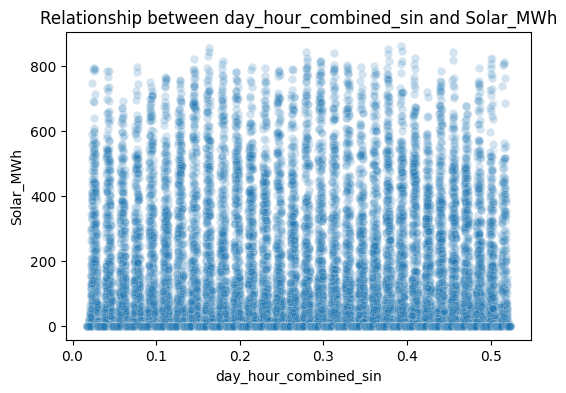

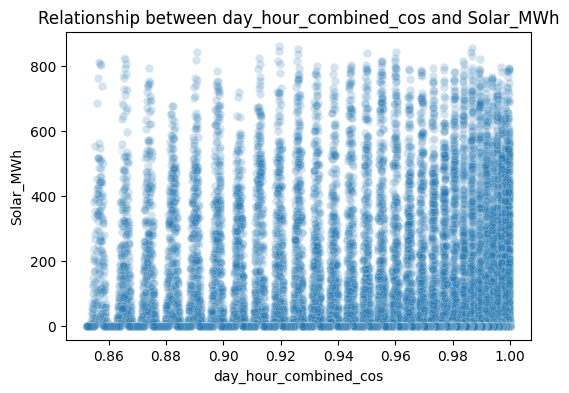

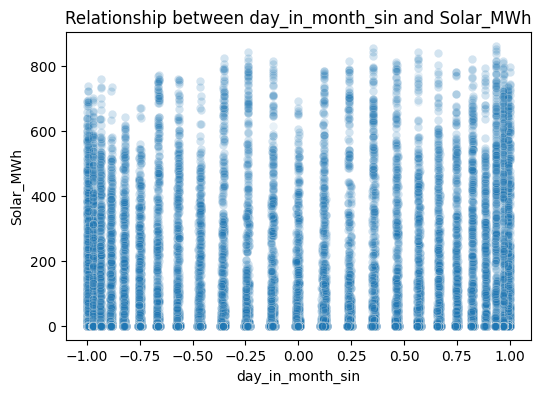

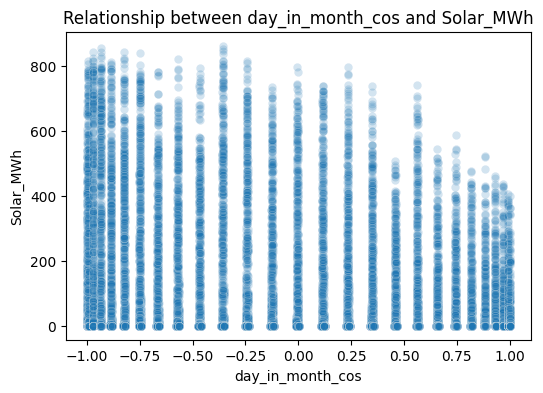

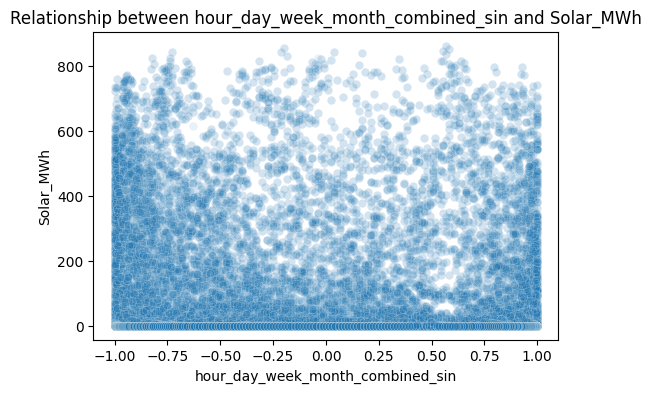

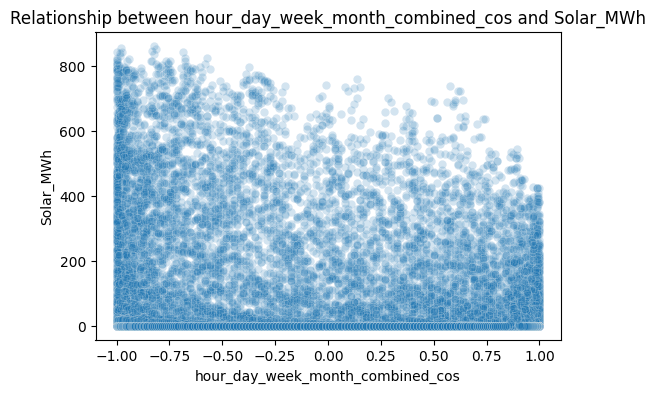

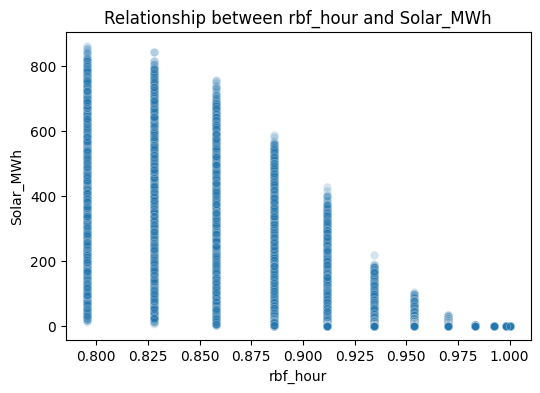

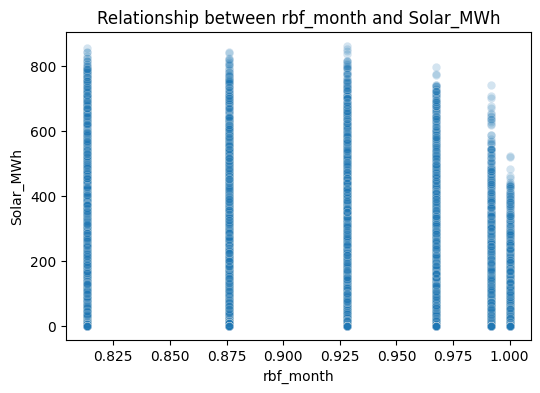

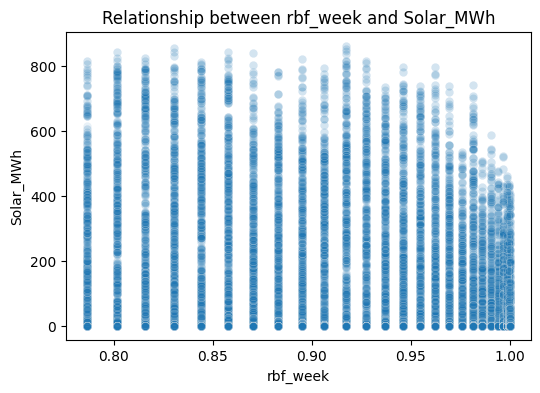

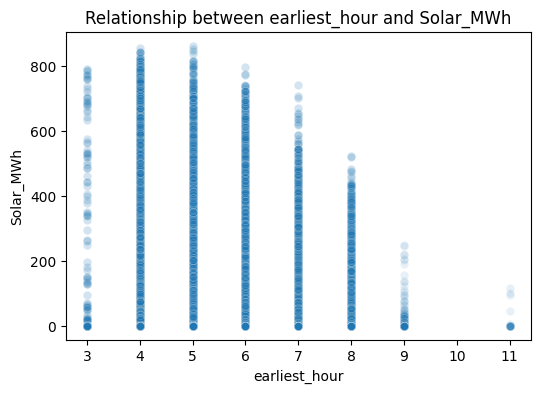

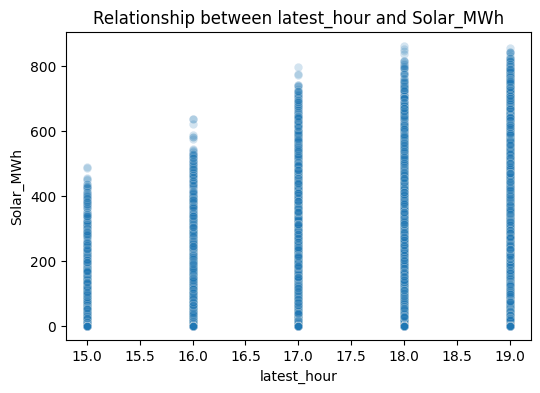

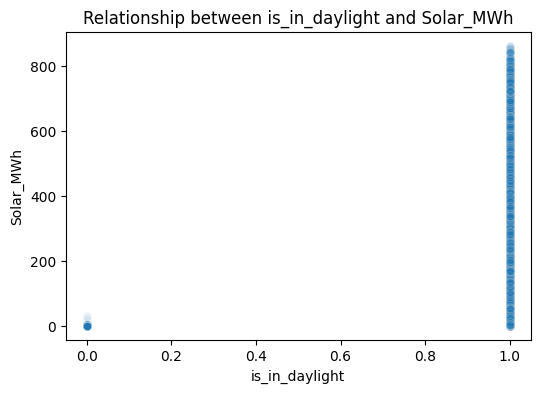

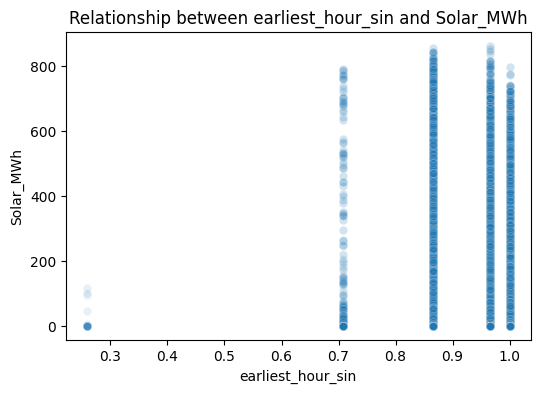

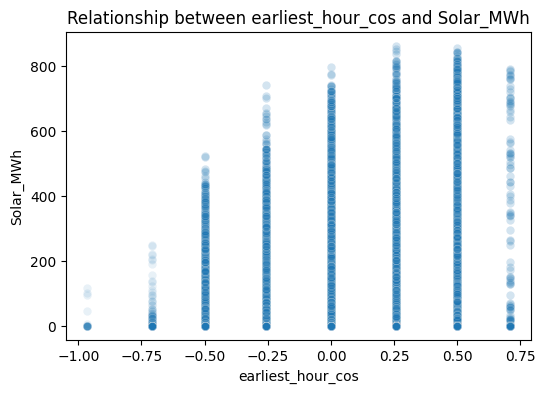

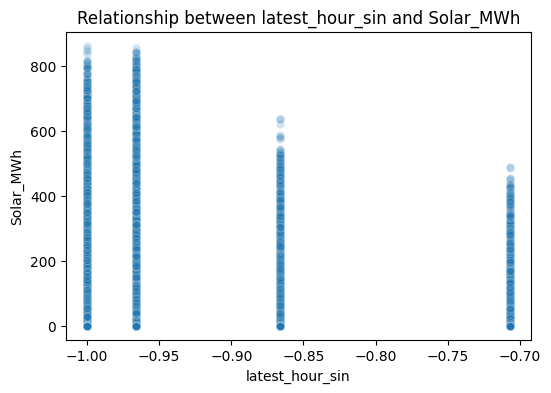

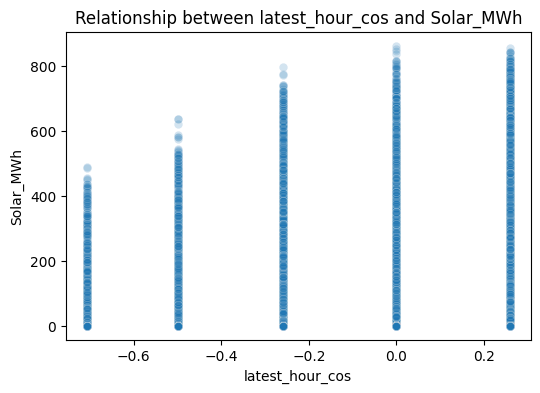

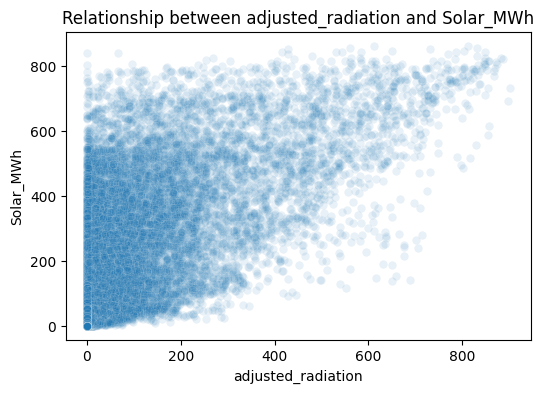

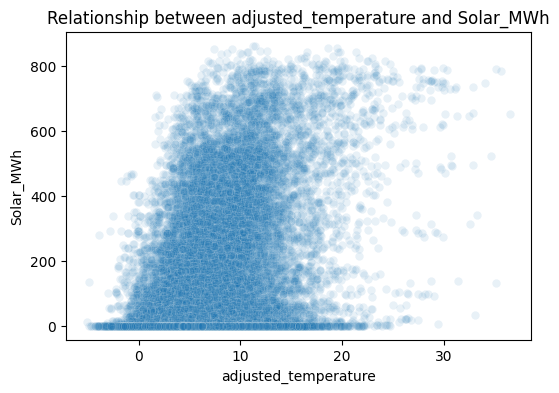

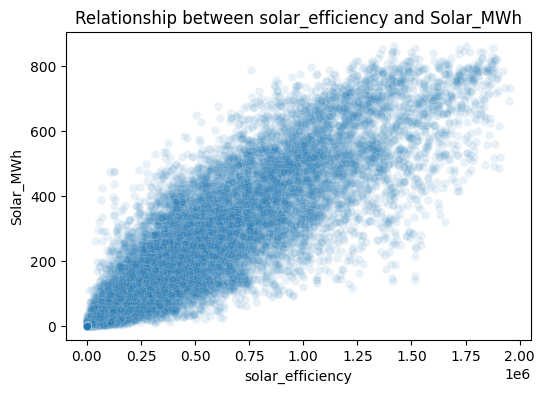

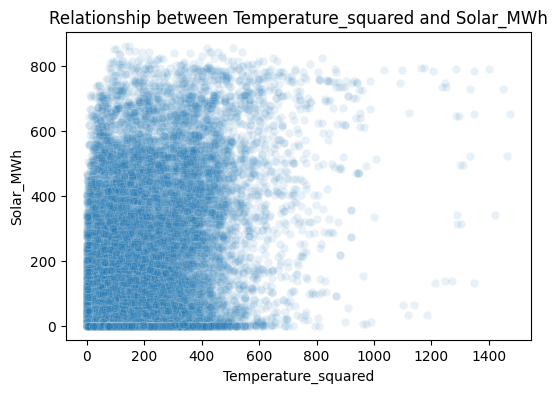

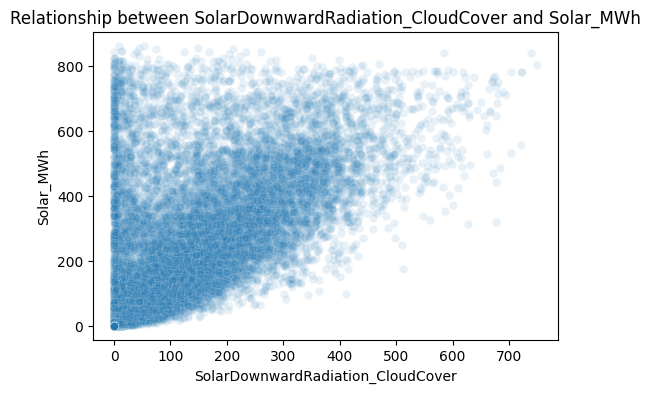

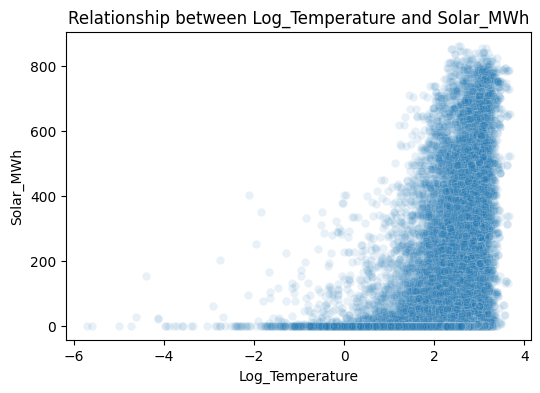

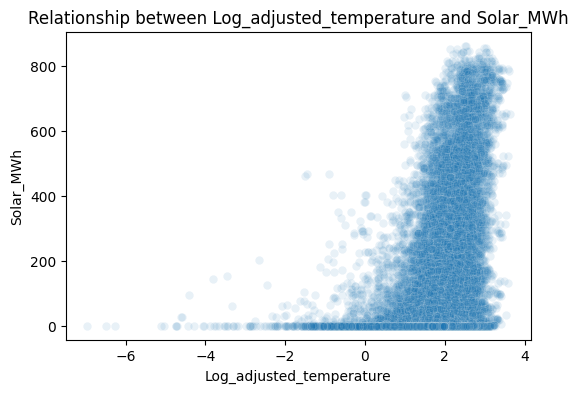

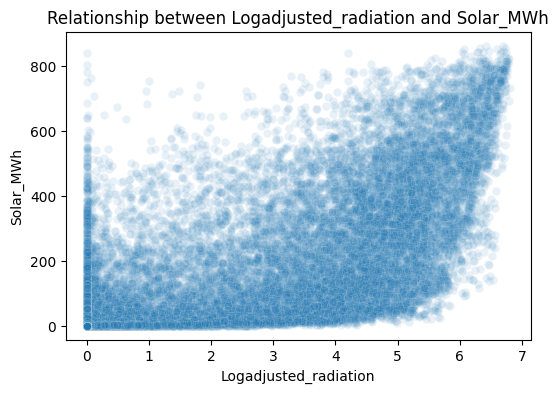

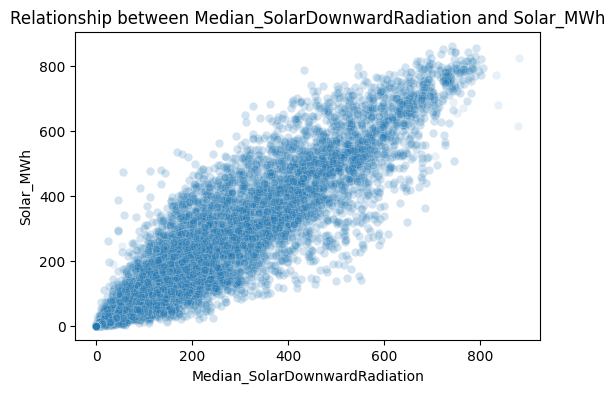

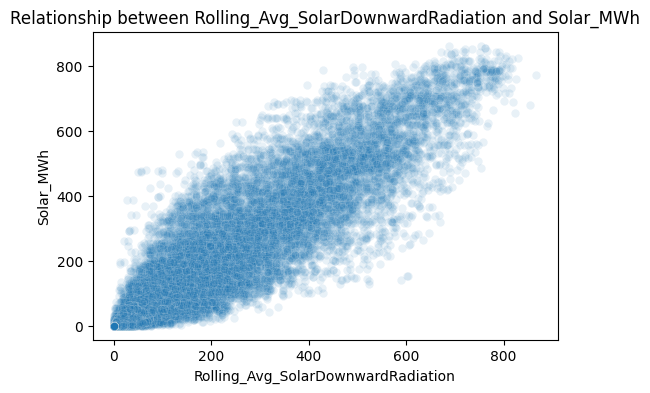

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot für jedes Feature gegen die Zielvariablen
for feature in merged_df.columns:
    if feature != 'Solar_MWh':  # Zielvariable nicht als Feature verwenden
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=merged_df[feature], y=merged_df['Solar_MWh'], alpha=0.1)
        plt.title(f'Relationship between {feature} and Solar_MWh')
        plt.show()


In [ ]:
param_grid = {
    'alpha': np.linspace(0.1, 10, 25),
}

model, evaluation_md, scaler, test_col, best_params = train_model_stacking(merged_df, 
                                                      [ "SolarDownwardRadiation", 
                                                      #"Rolling_Avg_SolarDownwardRadiation",
                                                      #"Median_SolarDownwardRadiation",
                                                      "solar_efficiency",
                                                      "Temperature_squared",
                                                      #"Log_Temperature",
                                                      "Log_adjusted_radiation",
                                                      "Log_adjusted_temperature",
                                                      "SolarDownwardRadiation_CloudCover",

                                                              "Temperature", 
                                                               "adjusted_radiation",
                                                               "adjusted_temperature",
                                                               "CloudCover", 
                                                               "Solar_capacity_mwp",
                                                               #"Season", 
                                                                 "hour_sin", 
                                                                 "hour_cos",
                                                                  "hour",
                                                                 "month_sin",
                                                                 "month_cos",
                                                                "month",
                                                                "week_sin",
                                                                 "week_cos",
                                                                    "week", 
                                                                 "Weather Model",
                                                                  "is_in_daylight",
                                                                #  "earliest_hour",
                                                                #  "latest_hour",
                                                                "earliest_hour_sin",
                                                               "earliest_hour_cos",
                                                               "latest_hour_sin",
                                                                "latest_hour_cos",
                                                                "rbf_hour",
                                                                
                                                                "week_hour_combined_sin",
                                                                "week_hour_combined_cos",
                                                                "day_in_month_sin",
                                                                "day_in_month_cos",
                                                                "day_hour_combined_sin",
                                                                "day_hour_combined_cos",
                                                                "hour_day_week_month_combined_sin",
                                                                "hour_day_week_month_combined_cos",
                                                                ], 
                                                    "Solar_MWh",
                                                    param_grid)

In [10]:
display(Markdown(evaluation_md))

### StackingRegressor(estimators=[('ridge', Ridge()),
                              ('rf',
                               RandomForestRegressor(n_estimators=5,
                                                     n_jobs=-1)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=True,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_p...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=Ridge(alpha=0.1)) Evaluation

| Dataset | R² | RMSE | MAE | Rows | Columns |
|---------|--------:|------------:|--------:|-------:|-------:|
| Train   | 0.96011 | 36.77 | 17.57 | 31524 | 121 |
| Test    | 0.93194 | 48.02 | 23.02 | 7881 | 121 |



Alpha value: Ridge(alpha=0.1)


In [11]:
test_col

Index(['SolarDownwardRadiation', 'solar_efficiency', 'Temperature_squared',
       'SolarDownwardRadiation_CloudCover', 'Temperature',
       'adjusted_radiation', 'adjusted_temperature', 'CloudCover',
       'Solar_capacity_mwp', 'hour_sin',
       ...
       'week_48', 'week_49', 'week_50', 'week_51', 'week_52', 'week_53',
       'Weather Model_DWD ICON', 'Weather Model_NCEP GFS',
       'is_in_daylight_False', 'is_in_daylight_True'],
      dtype='object', length=121)

In [12]:
# take model and generate the .pkl files to upload
merged_test_df = merge_forcast_and_train_df(df_forecast, df_test1)
merged_test2_df = merge_forcast_and_train_df(df_forecast, df_test2)


# create Features
merged_test_df = await create_seasons(merged_test_df)
merged_test2_df = await create_seasons(merged_test2_df)

# create hours and months as categorical features
merged_test_df = await create_datetime_features(merged_test_df)
merged_test2_df = await create_datetime_features(merged_test2_df)

# 
merged_test_df = await check_if_in_daylight(merged_test_df)
merged_test2_df = await check_if_in_daylight(merged_test2_df)

merged_test_df = await create_adjusted_values(merged_test_df)
merged_test2_df = await create_adjusted_values(merged_test2_df)


# scale the data
merged_test_pred_df = test_model(model, scaler, merged_test_df, test_col)
merged_test2_pred_df = test_model(model, scaler, merged_test2_df, test_col)

                        dtm              ref_datetime  Solar_capacity_mwp  \
0 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
1 2023-01-01 00:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
2 2023-01-01 01:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
3 2023-01-01 01:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   
4 2023-01-01 02:00:00+00:00 2022-12-31 00:00:00+00:00         2262.233423   

   valid_time  SolarDownwardRadiation  CloudCover  Temperature Weather Model  \
0          24                0.000000     0.99957    10.612988      DWD ICON   
1          24                0.000000     0.99525    11.345912      NCEP GFS   
2          25                0.000000     1.00000    10.425348      DWD ICON   
3          25                0.000000     0.98830    10.601108      NCEP GFS   
4          26                0.021875     1.00000    10.405902      DWD ICON   

             valid_datetime  Season  ...  week_cos  week

/home/jan-david/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jan-david/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jan-david/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jan-david/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Series([], dtype: int64)
Empty DataFrame
Columns: [dtm, ref_datetime, Solar_capacity_mwp, valid_time, SolarDownwardRadiation, CloudCover, Temperature, valid_datetime, day, hour_sin, hour_cos, month_sin, month_cos, week_sin, week_cos, week_hour_combined_sin, week_hour_combined_cos, day_hour_combined_sin, day_hour_combined_cos, day_in_month_sin, day_in_month_cos, hour_day_week_month_combined_sin, hour_day_week_month_combined_cos, rbf_hour, rbf_month, rbf_week, earliest_hour_sin, earliest_hour_cos, latest_hour_sin, latest_hour_cos, adjusted_radiation, adjusted_temperature, solar_efficiency, Temperature_squared, SolarDownwardRadiation_CloudCover, Log_Temperature, Log_adjusted_temperature, Logadjusted_radiation, Weather Model_DWD ICON, Weather Model_NCEP GFS, Season_Frühling, Season_Herbst, Season_Sommer, Season_Winter, hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hou

In [13]:
merged_test_pred_df.to_pickle('test1.pkl')
merged_test2_pred_df.to_pickle('test2.pkl')